In [25]:
import pandas as pd
import seaborn as sb

In [26]:
import warnings;
warnings.filterwarnings('ignore')

#load csv national categories csv file 
df =pd.read_csv("national_categories.csv")
df['appointment_date'].dtype

dtype('O')

In [27]:
#Change date format to datetime format
df['appointment_datetime'] = pd.to_datetime(df['appointment_date'])
df.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,appointment_datetime
0,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08,2021-02-08
1,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08,2021-02-08
2,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08,2021-02-08
3,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08,2021-02-08
4,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08,2021-02-08


In [28]:
# sense-check the DataFrames
df.appointment_datetime.dtypes

dtype('<M8[ns]')

In [29]:
#min scheduled appoinment
df.appointment_date.min()

'01/01/2022'

In [30]:
#max scheduled appointment
df.appointment_date.max()

'31/12/2021'

In [31]:
# determine the numnber of service setting 
nc=df[df['sub_icb_location_name']=="NHS North West London ICB - W2U3Z"]
nc['appointment_date'].astype(str)
nc=nc[nc['appointment_date'].apply(lambda x:int(x.split('/')[0])>=1 and int(x.split('/')[1])>=1 and int(x.split('/')[-1])==2022)]
nc=nc[nc['appointment_date'].apply(lambda x:x<="6/1/2022")]
nc['service_setting'].count()

7039

In [32]:
#total number of appointments per month using sum() function.
nc['count_of_appointments'].sum()

6609428

In [34]:

nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
appointment_datetime     datetime64[ns]
dtype: object

In [35]:
#month with highest appointment booked 
nc['year'] = nc['appointment_datetime'].dt.year
nc['month'] = nc['appointment_datetime'].dt.month

In [36]:
#total number of appointments per month using sum() function
nc.groupby([nc['year'], nc['month']])['count_of_appointments'].sum().sort_values()

year  month
2022  12       165736
      8        217393
      9        220169
      11       263835
      10       266135
      7        270138
      2        684575
      4        849659
      5        887903
      1        894903
      3        911598
      6        977384
Name: count_of_appointments, dtype: int64

In [37]:
#number of appointments per month 
nc['appointment_month'] = pd.DatetimeIndex(nc['appointment_datetime']).month.astype(str)

In [38]:
nc['appointment_month']

800289    1
800290    1
800291    1
800292    1
800293    1
         ..
807323    6
807324    6
807325    6
807326    6
807327    6
Name: appointment_month, Length: 7039, dtype: object

In [39]:
nc_ss = pd.DataFrame()

In [40]:
nc_ss["count_of_appointments"] = nc.groupby([nc['appointment_month']])['count_of_appointments'].sum()

In [41]:
nc_ss.head()

,count_of_appointments
appointment_month,
1,894903
10,266135
11,263835
12,165736
2,684575


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

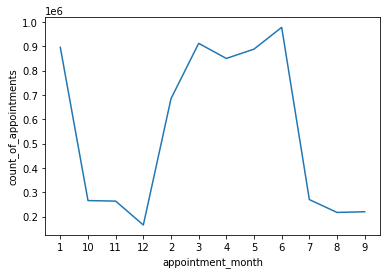

In [43]:
#count of appointment per month using seaborn
sns.lineplot(x = "appointment_month", y = "count_of_appointments", data=nc_ss)
plt.show()